# Product review system

In [1]:
# uploading required files 
from google.colab import files 
a = files.upload()

Saving amazon_alexa.tsv to amazon_alexa.tsv


In [2]:
# import libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [4]:
data = pd.read_csv("/content/amazon_alexa.tsv", sep="\t")
data.sample(5)

,rating,date,variation,verified_reviews,feedback
2034,5,17-Jul-18,White Plus,Exchange new color,1
2481,5,30-Jul-18,Black Dot,Love my echo. Love playing music in my room,1
1316,5,21-Jul-18,White Spot,This is the best Alexa enabled device you can ...,1
1018,5,29-Jul-18,Heather Gray Fabric,Great,1
1844,4,28-Jul-18,Black Plus,I enjoy the various functions of the device,1


## EDA

In [5]:
columns = []
for i in data.columns:
  columns.append(i)

columns

['rating', 'date', 'variation', 'verified_reviews', 'feedback']

In [6]:
data.shape

(3150, 5)

In [7]:
for i in columns:
  print("No. of unique values in ", i, " is = ", len(np.unique(data[i])))

No. of unique values in  rating  is =  5
No. of unique values in  date  is =  77
No. of unique values in  variation  is =  16
No. of unique values in  verified_reviews  is =  2301
No. of unique values in  feedback  is =  2


In [8]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [10]:
# dropping date as it is of no use in NLP 
data.drop(labels='date', axis=1, inplace=True)
data.head()\

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1


In [11]:
# using label encoder to transform the categorical column 
from sklearn.preprocessing import LabelEncoder
data['variation'] = LabelEncoder().fit_transform(data['variation'])
data.tail()

,rating,variation,verified_reviews,feedback
3145,5,1,"Perfect for kids, adults and everyone in betwe...",1
3146,5,1,"Listening to music, searching locations, check...",1
3147,5,1,"I do love these things, i have them running my...",1
3148,5,12,Only complaint I have is that the sound qualit...,1
3149,4,1,Good,1


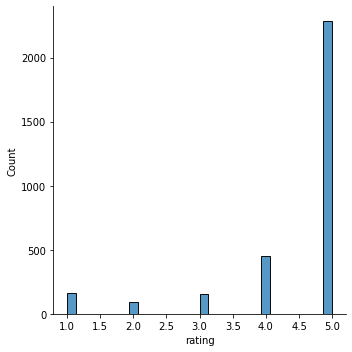

In [20]:
sns.displot(data,x='rating',legend=True)

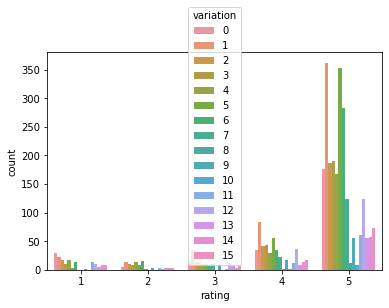

In [23]:
sns.countplot(x='rating',hue='variation',data=data)

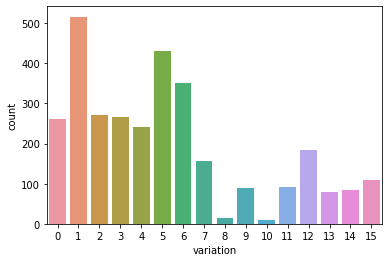

In [24]:
sns.countplot(x='variation',data=data)

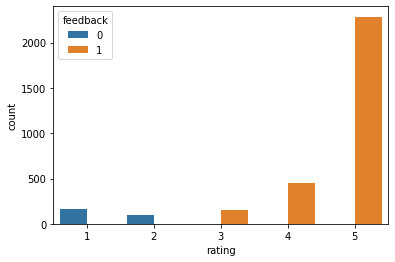

In [25]:
sns.countplot(x='rating',hue='feedback',data=data)

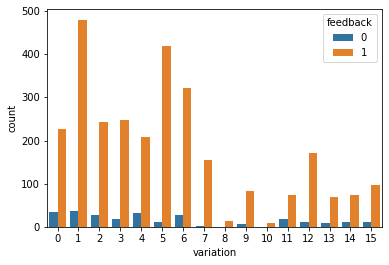

In [26]:
sns.countplot(x='variation',hue='feedback',data=data)

In [27]:
data.drop(labels=['variation', 'rating'], axis=1, inplace=True)
data.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [29]:
total_value = len(data['feedback'])

positive_comment = []
negative_comment = []

for i in data['feedback']:
  if i == 1:
    positive_comment.append(data['feedback'])
  else:
    negative_comment.append(data['feedback'])

print("% of positive comments = ", round(len(positive_comment)/total_value,2), "%")
print("% of negative comments = ", round(len(negative_comment)/total_value,2), "%")

% of positive comments =  0.92 %
% of negative comments =  0.08 %


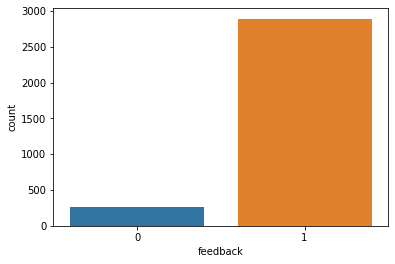

In [30]:
sns.countplot(x='feedback', data=data)

## feature engineering

In [31]:
# independent and dependent variables 
x = data['verified_reviews']
y = data['feedback']

In [32]:
from tensorflow import keras 
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(15212, lower=True, oov_token="UNK")
tokenizer.fit_on_texts(x)

x = tokenizer.texts_to_sequences(x)

In [33]:
from keras.preprocessing.sequence import pad_sequences
x_pad = pad_sequences(x, maxlen=80, padding='post')
x_pad[0]

array([11,  8, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int32)

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pad, y, test_size=0.33, random_state=4)

## Model Building

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=25, criterion='entropy', class_weight={0:6, 1:1})
rf_clf.fit(x_train, y_train)
pred_train = rf_clf.predict(x_train)
pred_test = rf_clf.predict(x_test)

In [37]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, pred_test))

0.9192307692307692


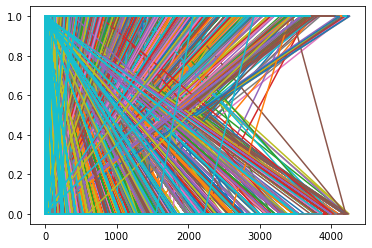

In [39]:
# plotting the output 
plt.plot(x_train, pred_train)
plt.show()

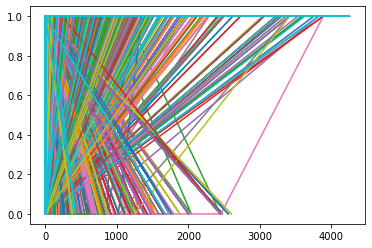

In [40]:
plt.plot(x_test, pred_test)
plt.show()

In [41]:
# checking our own review
def review_bot(feedback):
  sentence = []
  sentence.append(feedback)
  sentence_seq = tokenizer.texts_to_sequences(sentence)
  sentence_padded = pad_sequences(sentence_seq, maxlen=80, padding='post')
  ans = rf_clf.predict(sentence_padded)

  if ans.all() == 1:
    print("Positive Feedback!")
  else:
    print("Negatuve Feedback!")

In [42]:
review_bot(str(input("Enter a review : ")))

Enter a review : wow i got the offer letter
Positive Feedback!
